# Proyek Analisis Data: [E-Commerce Dataset]
- **Nama:** Hindun Alvia Rosyaada
- **Email:** hindunalfiarosada@gmail.com
- **ID Dicoding:** hindunalvia30


## Menentukan Pertanyaan Bisnis

- Berapa range jumlah pembayaran paling sering yang pernah dibayarkan customer?
- Bagaimana tingkat kepuasan customers berdasarkan review score?
- Negara bagian mana yang memiliki jumlah customers tertinggi dan terendah?


## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_item_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payment_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_review_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
order_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
products_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/hindunalvia30/dataproject/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1. Memeriksa Tipe Data

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak terdapat missing value dan masalah pada tipe data tabel customers. 

In [13]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak terdapat missing value, namun terdapat masalah pada tipe data kolom shipping_limit_date . 

In [14]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak terdapat missing value dan masalah pada tipe data tabel order_payment . 

In [15]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat missing value kolom review_comment_title, review_comment_message, dan masalah pada tipe data kolom review_creation_date dan review_answer_timestamp. 

In [16]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan masalah pada tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date . 

In [17]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm,  product_width_cm  dan tidak terdapat masalah pada tipe data tabel products. 

In [18]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak terdapat missing value dan masalah pada tipe data tabel sellers . 

2. Memeriksa Duplikasi Data

In [19]:
print("Jumlah duplikasi pada tabel customers: ",customers_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order_item: ",order_item_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order_payment: ",order_payment_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order_review: ",order_review_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order: ", order_df.duplicated().sum())
print("Jumlah duplikasi pada tabel product: ",products_df.duplicated().sum())
print("Jumlah duplikasi pada tabel sellers: ",sellers_df.duplicated().sum())


Jumlah duplikasi pada tabel customers:  0
Jumlah duplikasi pada tabel order_item:  0
Jumlah duplikasi pada tabel order_payment:  0
Jumlah duplikasi pada tabel order_review:  0
Jumlah duplikasi pada tabel order:  0
Jumlah duplikasi pada tabel product:  0
Jumlah duplikasi pada tabel sellers:  0


### Cleaning Data

1. Menangani Missing Value

1.1 Menggunakan metode imputation untuk mengisi kolom yang kosong pada review_comment_title dan review_comment_message

In [20]:
order_review_df.fillna(value="Prefer not to say", inplace=True)

In [21]:
print(order_review_df)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4    Prefer n

1.2 Menggunakan metode dropping untuk menghilangkan kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date karena kolom tersebut tidak mengandung informasi yang penting. 

In [22]:
order_df[order_df.order_approved_at.isna()]
order_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [23]:
print(order_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp order_estimated_delivery_date  

1.3 Menggunakan metode imputation dengan modus untuk mengisi nilai missing value pada tabel products. 

In [24]:
products_df[products_df.product_category_name.isna()]
products_df.product_category_name.fillna(value=products_df.product_category_name.mode(), inplace=True)
products_df.product_name_lenght.fillna(value=products_df.product_name_lenght.mode(), inplace=True)
products_df.product_description_lenght.fillna(value=products_df.product_description_lenght.mode(), inplace=True)
products_df.product_photos_qty.fillna(value=products_df.product_photos_qty.mode(), inplace=True)
products_df.product_weight_g.fillna(value=products_df.product_weight_g.mode(), inplace=True)
products_df.product_length_cm.fillna(value=products_df.product_length_cm.mode(), inplace=True)
products_df.product_height_cm.fillna(value=products_df.product_height_cm.mode(), inplace=True)
products_df.product_width_cm.fillna(value=products_df.product_width_cm.mode(), inplace=True)
print(products_df)



                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

C:\Users\dell\AppData\Local\Temp\ipykernel_14384\1161725595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value=products_df.product_category_name.mode(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_14384\1161725595.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

2. Mengganti Tipe Data

Mengganti tipe data menjadi datetime pada kolom shipping_limit_date dari tabel order_item dan kolom review_creation_date, review_answer_timestammp dari tabel order_review

In [25]:
datetime_order_item = ["shipping_limit_date"]
for column in datetime_order_item:
    order_item_df[column] = pd.to_datetime(order_item_df[column])

datetime_order_review = ["review_creation_date","review_answer_timestamp"]
for column in datetime_order_review:
    order_review_df[column] = pd.to_datetime(order_review_df[column])


## Exploratory Data Analysis (EDA)

### Explore Order Payment

In [26]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [27]:
order_payment_df.order_id.is_unique

False

In [28]:
order_payment_df.order_id.duplicated

<bound method Series.duplicated of 0         b81ef226f3fe1789b1e8b2acac839d17
1         a9810da82917af2d9aefd1278f1dcfa0
2         25e8ea4e93396b6fa0d3dd708e76c1bd
3         ba78997921bbcdc1373bb41e913ab953
4         42fdf880ba16b47b59251dd489d4441a
                        ...               
103881    0406037ad97740d563a178ecc7a2075c
103882    7b905861d7c825891d6347454ea7863f
103883    32609bbb3dd69b3c066a6860554a77bf
103884    b8b61059626efa996a60be9bb9320e10
103885    28bbae6599b09d39ca406b747b6632b1
Name: order_id, Length: 103886, dtype: object>

### Explore Order Reviews

In [29]:
order_review_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Prefer not to say,Prefer not to say,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [30]:
order_review_df.order_id.is_unique

False

In [31]:
order_review_df.order_id.duplicated

<bound method Series.duplicated of 0        73fc7af87114b39712e6da79b0a377eb
1        a548910a1c6147796b98fdf73dbeba33
2        f9e4b658b201a9f2ecdecbb34bed034b
3        658677c97b385a9be170737859d3511b
4        8e6bfb81e283fa7e4f11123a3fb894f1
                       ...               
99219    2a8c23fee101d4d5662fa670396eb8da
99220    22ec9f0669f784db00fa86d035cf8602
99221    55d4004744368f5571d1f590031933e4
99222    7725825d039fc1f0ceb7635e3f7d9206
99223    90531360ecb1eec2a1fbb265a0db0508
Name: order_id, Length: 99224, dtype: object>

In [32]:
order_review_df.review_id.is_unique

False

In [33]:
order_review_df.review_id.duplicated

<bound method Series.duplicated of 0        7bc2406110b926393aa56f80a40eba40
1        80e641a11e56f04c1ad469d5645fdfde
2        228ce5500dc1d8e020d8d1322874b6f0
3        e64fb393e7b32834bb789ff8bb30750e
4        f7c4243c7fe1938f181bec41a392bdeb
                       ...               
99219    574ed12dd733e5fa530cfd4bbf39d7c9
99220    f3897127253a9592a73be9bdfdf4ed7a
99221    b3de70c89b1510c4cd3d0649fd302472
99222    1adeb9d84d72fe4e337617733eb85149
99223    efe49f1d6f951dd88b51e6ccd4cc548f
Name: review_id, Length: 99224, dtype: object>

### Explore Customers

In [34]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [35]:
customers_df.customer_id.is_unique

True

Convert Data to csv

In [39]:
order_payment_df.to_csv('orderpayment2.csv', index=False)

In [43]:
order_review_df.to_csv('orderreview2.csv', index=False)

In [47]:
customers_df.to_csv('customers2.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa range jumlah pembayaran paling sering yang pernah dibayarkan customer?

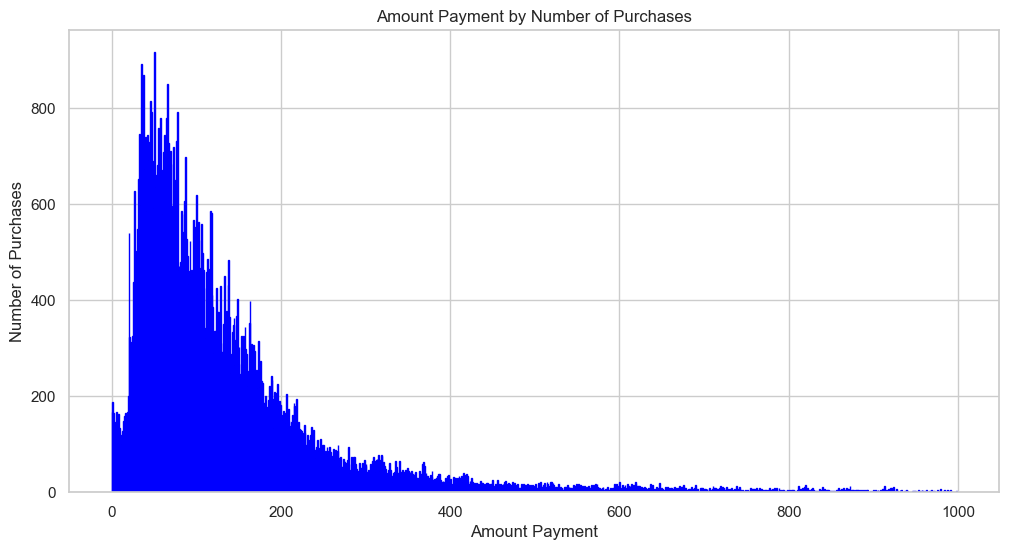

In [48]:

price_counts = order_payment_df['payment_value'].value_counts()


plt.figure(figsize=(12, 6))
plt.hist(order_payment_df['payment_value'], bins=range(0, 1000), color='black', edgecolor='blue')
plt.title('Amount Payment by Number of Purchases')
plt.xlabel('Amount Payment')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.show()

### Pertanyaan 2 : Bagaimana tingkat kepuasan customers berdasarkan review score?

C:\Users\dell\AppData\Local\Temp\ipykernel_14384\1235392063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,


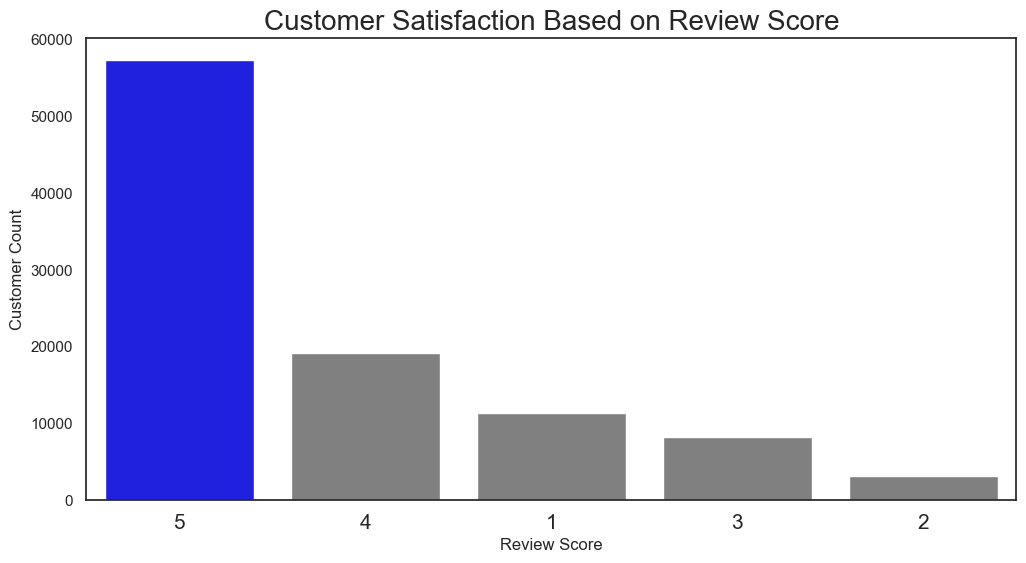

In [49]:
review_scores = order_review_df['review_score'].value_counts().sort_values(ascending=False)

most_score = review_scores.idxmax()

sns.set(style="white")

plt.figure(figsize=(12, 6))
sns.barplot(x=review_scores.index, 
            y=review_scores.values, 
            order=review_scores.index,
            palette=["blue" if score == most_score else "grey" for score in review_scores.index]
            )

plt.title("Customer Satisfaction Based on Review Score", fontsize=20)
plt.xlabel("Review Score")
plt.ylabel("Customer Count")
plt.xticks(fontsize=15)
plt.show()

### Pertanyaan 3 : Negara bagian mana yang memiliki jumlah customers tertinggi dan terendah?

C:\Users\dell\AppData\Local\Temp\ipykernel_14384\1845879284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_14384\1845879284.py:9: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


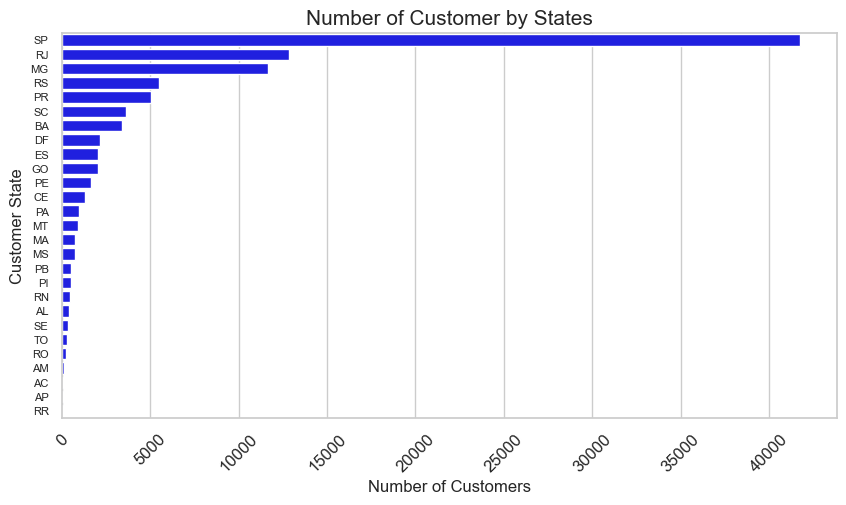

In [50]:
state_customer = customers_df['customer_state'].value_counts().sort_values(ascending=False)

most_common_state = state_customer.idxmax()

sns.set(style="whitegrid")  

plt.figure(figsize=(10, 5))
colors_ = ["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"]
sns.barplot(
    x=state_customer.values,  
    y=state_customer.index,  
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel("Customer State")  
plt.xlabel("Number of Customers")  
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=8)
plt.show()


## Conclusion

- Berapa range jumlah pembayaran paling sering yang pernah dibayarkan customer?
    <p> Berdasarkan hasil visualisasi, terlihat bahwa range jumlah pembayaran yang sering dibayarkan customer adalah 0-200 dollar. 

- Bagaimana tingkat kepuasan customers berdasarkan review score?
    <p> Berdasarkan hasil visualisasi dapat dilihat bahwa tingkat kepuasan customers adalah memuaskan karena customers yang memberikan review score 5 sangat banyak, disusul dengan review score 4 pada posisi kedua. 

- Negara bagian mana yang memiliki jumlah customers tertinggi dan terendah?
    <p> Berdasarkan hasil visualisasi, terlihat bahwa negara bagian yang memiliki jumlah customers tertinggi adalah SP dan negara bagian yang memiliki jumlah customers terendah adalah AC, AP dan RR